In [1]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_excel('/content/drive/My Drive/Base de dados_ climate_change.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data

,Year,Month,CO2,CH4,N2O,Temp
0,1983,5,345.96,1638.59,303.677,0.109
1,1983,6,345.52,1633.71,303.746,0.118
2,1983,7,344.15,1633.22,303.795,0.137
3,1983,8,342.25,1631.35,303.839,0.176
4,1983,9,340.17,1648.40,303.901,0.149
...,...,...,...,...,...,...
303,2008,8,384.15,1779.88,321.405,0.407
304,2008,9,383.09,1795.08,321.529,0.378
305,2008,10,382.99,1814.18,321.796,0.440
306,2008,11,384.13,1812.37,322.013,0.394


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    308 non-null    int64  
 1   Month   308 non-null    int64  
 2   CO2     308 non-null    float64
 3   CH4     308 non-null    float64
 4   N2O     308 non-null    float64
 5   Temp    308 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 14.6 KB


In [5]:
data.isna().sum()

Year     0
Month    0
CO2      0
CH4      0
N2O      0
Temp     0
dtype: int64

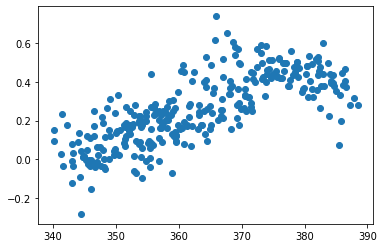

In [6]:
plt.scatter(data['CO2'], data['Temp'])

<BarContainer object of 308 artists>

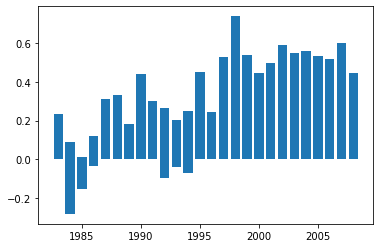

In [7]:
plt.bar(data['Year'], data['Temp'])

<BarContainer object of 308 artists>

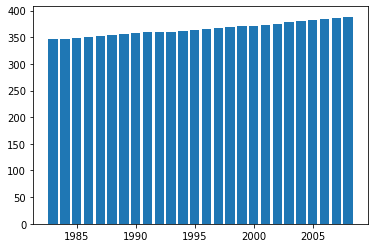

In [8]:
plt.bar(data['Year'],data['CO2'])

In [9]:
data.describe()

,Year,Month,CO2,CH4,N2O,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,363.226753,1749.824513,312.391834,0.256776
std,7.423197,3.447214,12.647125,46.051678,5.225131,0.179090
min,1983.000000,1.000000,340.170000,1629.890000,303.677000,-0.282000
25%,1989.000000,4.000000,353.020000,1722.182500,308.111500,0.121750
50%,1996.000000,7.000000,361.735000,1764.040000,311.507000,0.248000
75%,2002.000000,10.000000,373.455000,1786.885000,316.979000,0.407250
max,2008.000000,12.000000,388.500000,1814.180000,322.182000,0.739000


In [10]:
data.corr()

,Year,Month,CO2,CH4,N2O,Temp
Year,1.000000,-0.025789,0.985379,0.910563,0.994850,0.755731
Month,-0.025789,1.000000,-0.096287,0.017558,0.012395,-0.098016
CO2,0.985379,-0.096287,1.000000,0.872253,0.981135,0.748505
CH4,0.910563,0.017558,0.872253,1.000000,0.894409,0.699697
N2O,0.994850,0.012395,0.981135,0.894409,1.000000,0.743242
Temp,0.755731,-0.098016,0.748505,0.699697,0.743242,1.000000


In [11]:
data.drop('Month', axis=1,inplace=True)

In [12]:
#Predicting CO2 level

In [13]:
def model(m):
    np.random.seed(0)
    x = data.drop('CO2', axis=1)
    y = data['CO2']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    clf = m
    clf.fit(x_train, y_train)
    s = clf.score(x_test,y_test)
    return s

In [14]:
model(RandomForestRegressor())

0.9663331274720255

In [15]:
model(LinearRegression())

0.9679096654490235

In [16]:
np.random.seed(45)
x = data.drop('CO2', axis=1)
y = data['CO2']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = LinearRegression()
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.9780810637879982

In [17]:
y_preds = clf.predict(x_test)
mean_absolute_error(y_test, y_preds)

1.6292241425456537

In [18]:
grid={'n_estimators': [10,100,200,500,1000,1200], 
      'max_depth':[None, 5, 10, 20, 30], 
      'max_features':[0.5, 0.2, 'auto', 'sqrt'],
      'min_samples_split':[2,4,6],
      'min_samples_leaf':[1,2,4]}
np.random.seed(45)
x = data.drop('CO2', axis=1)
y = data['CO2']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestRegressor()
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=50, 
                            cv=5,
                            verbose=2)
rs_clf.fit(x_train, y_train)
rs_clf.score(x_test,y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total

0.9778079620335495

In [19]:
y_preds2 = rs_clf.predict(x_test)
mean_absolute_error(y_test, y_preds2)

1.6025714516128213